# Explore here

It's recommended to use this notebook for exploration purposes.

In [15]:

pip install pandas


  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 86.6 MB/s eta 0:00:00a 0:00:01
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
url = 'https://ycharts.com/companies/TSLA/revenues'  # Replace this with the target website URL
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    html_data = response.text
else:
    print(f'Request failed with status code: {response.status_code}')
html_data



'\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=function(

In [7]:
import time
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, "html.parser")
soup


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [8]:
# Find all tables
tables = soup.find_all("table")
tables

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                                 24.93B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2023</td>
 <td class="text-right">
                             
                                 23.33B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2022</td>
 <td class="text-right">
                             
               

In [18]:
import pandas as pd
for index, table in enumerate(tables):
    if ("Date" in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_revenue_1 = pd.DataFrame(columns = ["Date", "Value"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Value = col[1].text.strip().replace(".","").replace("B","000")
        tesla_revenue_1 = pd.concat([tesla_revenue_1, pd.DataFrame({
            "Date": Date,
            "Value": Value
        }, index = [0])], ignore_index = True)

tesla_revenue_1.head()


,Date,Value
0,"December 31, 2023",2517000
1,"September 30, 2023",2335000
2,"June 30, 2023",2493000
3,"March 31, 2023",2333000
4,"December 31, 2022",2432000


In [19]:
for index, table in enumerate(tables):
    if ("Date" in str(table)):
        table_index = index
        
tesla_revenue_2 = pd.DataFrame(columns = ["Date", "Value"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Value = col[1].text.strip().replace(".","").replace("M","0").replace("B","000")
        tesla_revenue_2 = pd.concat([tesla_revenue_2, pd.DataFrame({
            "Date": Date,
            "Value": Value
        }, index = [0])], ignore_index = True)

tesla_revenue_2.head()

,Date,Value
0,"September 30, 2017",2985000
1,"June 30, 2017",2790000
2,"March 31, 2017",2696000
3,"December 31, 2016",2285000
4,"September 30, 2016",2298000


Concatenacion de ambas tablas

In [31]:
tesla_revenue = pd.concat([tesla_revenue_1, tesla_revenue_2], ignore_index=True)
tesla_revenue.head()

,Date,Value
0,"December 31, 2023",2517000
1,"September 30, 2023",2335000
2,"June 30, 2023",2493000
3,"March 31, 2023",2333000
4,"December 31, 2022",2432000


In [93]:
import pandas as pd
import numpy as np
import datetime

dates = pd.to_datetime(tesla_revenue['Date'])
values = tesla_revenue['Value']
df = pd.DataFrame({
    "Date":dates,
    "Value":values
})
df['Date'] = pd.to_datetime(df['Date']).dt.date

print(df)


          Date    Value
0   2023-12-31  2517000
1   2023-09-30  2335000
2   2023-06-30  2493000
3   2023-03-31  2333000
4   2022-12-31  2432000
5   2022-09-30  2145000
6   2022-06-30  1693000
7   2022-03-31  1876000
8   2021-12-31  1772000
9   2021-09-30  1376000
10  2021-06-30  1196000
11  2021-03-31  1039000
12  2020-12-31  1074000
13  2020-09-30  8771000
14  2020-06-30  6036000
15  2020-03-31  5985000
16  2019-12-31  7384000
17  2019-09-30  6303000
18  2019-06-30   635000
19  2019-03-31  4541000
20  2018-12-31  7226000
21  2018-09-30  6824000
22  2018-06-30  4002000
23  2018-03-31  3409000
24  2017-12-31  3288000
25  2017-09-30  2985000
26  2017-06-30  2790000
27  2017-03-31  2696000
28  2016-12-31  2285000
29  2016-09-30  2298000
30  2016-06-30  1270000
31  2016-03-31  1147000
32  2015-12-31  1214000
33  2015-09-30   936790
34  2015-06-30   954980
35  2015-03-31   939880
36  2014-12-31   956660
37  2014-09-30   851800
38  2014-06-30   769350
39  2014-03-31   620540
40  2013-12-31  

In [96]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [97]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Value)""")

In [98]:
tesla_tuples = list(df.to_records(index = False))
tesla_tuples[:5]

[(datetime.date(2023, 12, 31), '2517000'),
 (datetime.date(2023, 9, 30), '2335000'),
 (datetime.date(2023, 6, 30), '2493000'),
 (datetime.date(2023, 3, 31), '2333000'),
 (datetime.date(2022, 12, 31), '2432000')]

In [99]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

/tmp/ipykernel_1173/2099262939.py:1: DeprecationWarning: The default date adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)


In [100]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2023-12-31', '2517000')
('2023-09-30', '2335000')
('2023-06-30', '2493000')
('2023-03-31', '2333000')
('2022-12-31', '2432000')
('2022-09-30', '2145000')
('2022-06-30', '1693000')
('2022-03-31', '1876000')
('2021-12-31', '1772000')
('2021-09-30', '1376000')
('2021-06-30', '1196000')
('2021-03-31', '1039000')
('2020-12-31', '1074000')
('2020-09-30', '8771000')
('2020-06-30', '6036000')
('2020-03-31', '5985000')
('2019-12-31', '7384000')
('2019-09-30', '6303000')
('2019-06-30', '635000')
('2019-03-31', '4541000')
('2018-12-31', '7226000')
('2018-09-30', '6824000')
('2018-06-30', '4002000')
('2018-03-31', '3409000')
('2017-12-31', '3288000')
('2017-09-30', '2985000')
('2017-06-30', '2790000')
('2017-03-31', '2696000')
('2016-12-31', '2285000')
('2016-09-30', '2298000')
('2016-06-30', '1270000')
('2016-03-31', '1147000')
('2015-12-31', '1214000')
('2015-09-30', '936790')
('2015-06-30', '954980')
('2015-03-31', '939880')
('2014-12-31', '956660')
('2014-09-30', '851800')
('2014-06-30', '76

In [78]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


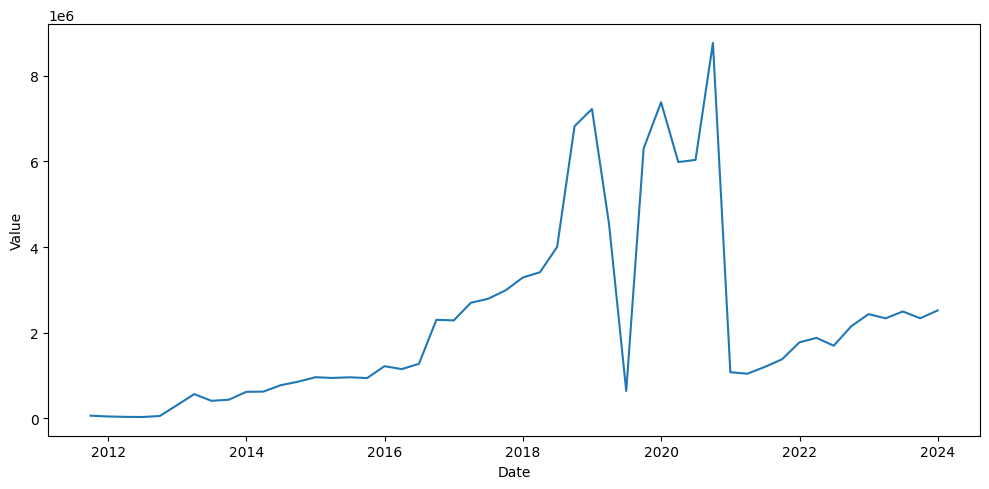

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

df["Date"] = pd.to_datetime(df["Date"])
df["Value"] = df["Value"].astype('int')
sns.lineplot(data = df, x = "Date", y = "Value")

plt.tight_layout()

plt.show()

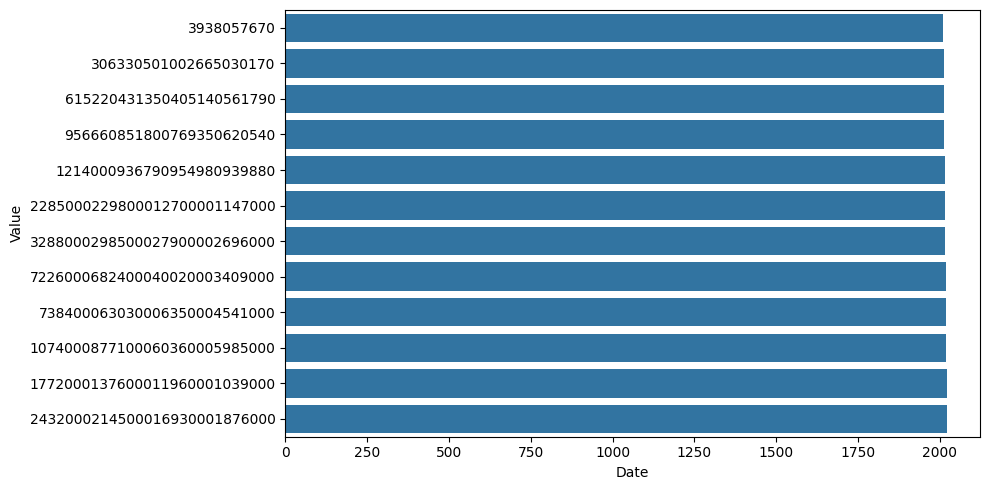

In [116]:
fig, axis = plt.subplots(figsize = (10, 5))

df["Date"] = pd.to_datetime(df["Date"])
tesla_profit_yearly = df.groupby(df["Date"].dt.year)['Value'].sum().reset_index()

sns.barplot(data = tesla_profit_yearly[tesla_profit_yearly["Date"] < 2023], x = "Date", y = "Value")

plt.tight_layout()

plt.show()

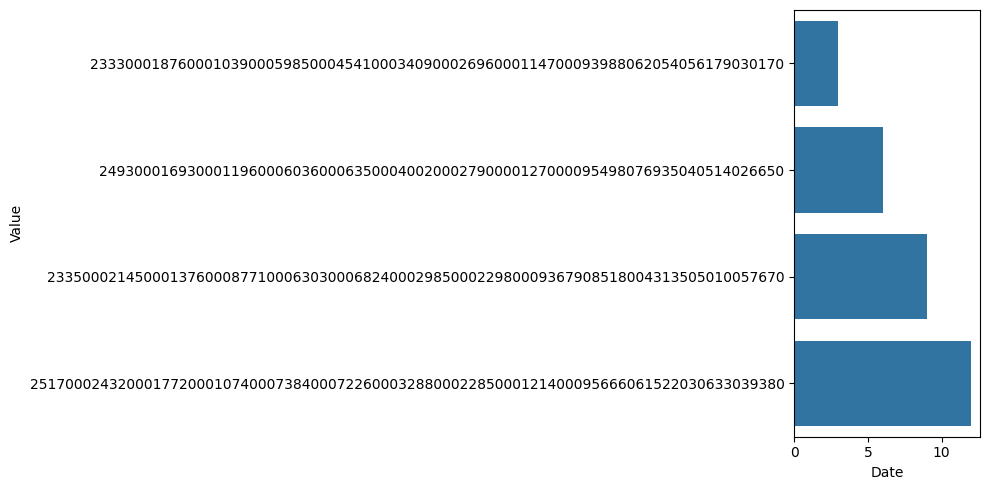

In [111]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = df.groupby(df["Date"].dt.month)['Value'].sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Value")

plt.tight_layout()

plt.show()